<a href="https://colab.research.google.com/github/Henriquerezer/FLAI-Cursos/blob/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#bibliotecas básicas 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/FLAI-Cursos/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Dados/base_rf.csv')
display(data)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Processamento dos dados

In [3]:
data.loc[:,'y'] = data.y.replace('no', 0).replace('yes', 1)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [4]:
X = data.drop('y', axis = 1)
y = data['y']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [6]:
from sklearn.preprocessing import OrdinalEncoder

X_train_o = X_train.copy()
X_test_o  = X_test.copy()

#Fazendo um encoder para cada coluna, assim manteremos a rastreabilidade

encoders = {} # a chave vai ser o nome da coluna
for col,dtype in X_train_o.dtypes.items():
  if dtype == 'object':
    encoders[col] = OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value = -1) # Aqui estamos dizendo para a função, colocar o valor de -1, quando encontrar valores ainda não vistos nos dados de treino. Para evitar erros.
    X_train_o.loc[:,col] = encoders[col].fit_transform(X_train_o[[col]]) # Utilizando 2 colchetes, irá ser retornado um dataframe de uma coluna, ao invés de uma matriz.
    X_test_o.loc[:,col] = encoders[col].transform(X_test_o[[col]]) # Nos dados de treino ( Aprendo e transformo ) e nos dados de teste ( Aprnas transformo)

X_train_o

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
39075,29,0.0,1.0,6.0,0.0,0.0,0.0,0.0,2.0,1.0,3,999,1,0.0,-3.0,92.713,-33.0,0.709,5023.5
34855,29,9.0,2.0,6.0,0.0,0.0,0.0,1.0,6.0,0.0,4,999,0,1.0,-1.8,92.893,-46.2,1.250,5099.1
7107,45,1.0,1.0,1.0,1.0,2.0,0.0,1.0,6.0,2.0,2,999,0,1.0,1.1,93.994,-36.4,4.860,5191.0
31614,34,7.0,1.0,6.0,0.0,0.0,0.0,0.0,6.0,2.0,1,999,1,0.0,-1.8,92.893,-46.2,1.327,5099.1
34878,32,0.0,2.0,3.0,0.0,0.0,0.0,0.0,6.0,0.0,9,999,0,1.0,-1.8,92.893,-46.2,1.250,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,5.0,1.0,5.0,1.0,0.0,0.0,1.0,6.0,3.0,2,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0
11284,37,4.0,1.0,6.0,0.0,0.0,0.0,1.0,4.0,2.0,1,999,0,1.0,1.4,94.465,-41.8,4.961,5228.1
38158,35,0.0,1.0,3.0,0.0,2.0,0.0,0.0,8.0,2.0,1,4,1,2.0,-3.4,92.431,-26.9,0.754,5017.5
860,40,4.0,1.0,6.0,0.0,2.0,0.0,1.0,6.0,4.0,2,999,0,1.0,1.1,93.994,-36.4,4.856,5191.0


# Utilizando LightLGBM

In [ ]:
# Utilizando LightLGBM

from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth'     : [3,5,7,9,11],
    'n_estimators'  : [50,100,150,200],
    'learning_rate' : [0.01,0.03,0.05,0.1,0.2],
    'reg_alpha'     : [0,0.1,0.4,0.5,0.6,0.7],
    #'reg_lambda'    : [0,0.1,0.5]
}

lgbm = GridSearchCV(
    LGBMClassifier(n_estimators = 500, random_state = 42, n_jobs = -1),
    params,
    cv= 5,
    scoring = 'roc_auc',
    verbose = 10
)

lgbm.fit(X_train_o, y_train) #17 min

In [8]:
lgbm.best_params_

{'learning_rate': 0.03, 'max_depth': 9, 'n_estimators': 100, 'reg_alpha': 0.6}

In [9]:
from sklearn.metrics import roc_auc_score

pred = lgbm.predict_proba(X_test_o)[:,1]

print('Score ROC_AUC : ', roc_auc_score(y_test, pred))

Score ROC_AUC :  0.8000288751516946


In [10]:
lgbm.best_estimator_.feature_importances_

array([547, 134,  29, 139,  50,  33,  15, 123, 128, 203, 318, 123,  62,
       102,  30, 127, 147, 581, 109])

In [11]:
importance = lgbm.best_estimator_.feature_importances_
cols = X_train_o.columns
order = np.argsort(importance)[::-1] #Indices que ordenam em ordem crescente, depois invertemos com [::-1] para que fique em ordem decrescente

for col,imp in zip(cols[order], importance[order]):
  print(f'{col:30s} {imp: .2f}')


# Quantas vezes a feature apareceu nas árvores treinadas

euribor3m                       581.00
age                             547.00
campaign                        318.00
day_of_week                     203.00
cons.conf.idx                   147.00
education                       139.00
job                             134.00
month                           128.00
cons.price.idx                  127.00
pdays                           123.00
contact                         123.00
nr.employed                     109.00
poutcome                        102.00
previous                        62.00
default                         50.00
housing                         33.00
emp.var.rate                    30.00
marital                         29.00
loan                            15.00


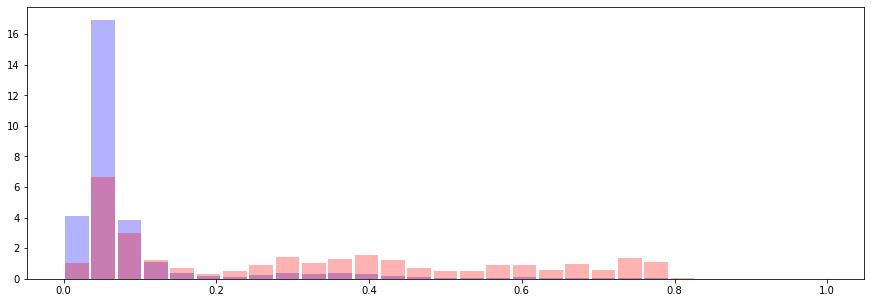

In [12]:
plt.figure(figsize=(15,5))

plt.hist(pred[y_test==0], bins = np.linspace(0,1,30), density = True, color = 'b', alpha = 0.3, rwidth = 0.9)
plt.hist(pred[y_test==1], bins = np.linspace(0,1,30), density = True, color = 'r', alpha = 0.3, rwidth = 0.9);

# Utilizando XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth'     : [3,5,7,9,11],
    'n_estimators'  : [50,100,150,200],
    'learning_rate' : [0.05,0.1,0.2],
    'reg_alpha'     : [0,0.1,0.5],
    #'reg_lambda'    : [0,0.1,0.5]
}

xbg = GridSearchCV(
    XGBClassifier(n_estimators = 500, random_state = 42, n_jobs = -1, use_label_encoder = False, eval_metrics = 'logloss'),
    params,
    cv= 5,
    scoring = 'roc_auc',
    verbose = 10
)

xbg.fit(X_train_o, y_train) # 40 min

In [14]:
xbg.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'reg_alpha': 0}

In [15]:
from sklearn.metrics import roc_auc_score

pred = xbg.predict_proba(X_test_o)[:,1]

print('Score ROC_AUC : ', roc_auc_score(y_test, pred))

Score ROC_AUC :  0.798256752151294


In [16]:
xbg.best_estimator_.feature_importances_

array([0.00905093, 0.00890982, 0.00915934, 0.00873132, 0.01764259,
       0.00809722, 0.00555823, 0.03087229, 0.02743469, 0.01556565,
       0.01048454, 0.06714299, 0.00672049, 0.0548044 , 0.02004739,
       0.01739921, 0.04614868, 0.03162432, 0.60460585], dtype=float32)

In [17]:
importance = xbg.best_estimator_.feature_importances_
cols = X_train_o.columns
order = np.argsort(importance)[::-1] #Indices que ordenam em ordem crescente, depois invertemos com [::-1] para que fique em ordem decrescente

for col,imp in zip(cols[order], importance[order]):
  print(f'{col:30s} {imp: .2f}')

nr.employed                     0.60
pdays                           0.07
poutcome                        0.05
cons.conf.idx                   0.05
euribor3m                       0.03
contact                         0.03
month                           0.03
emp.var.rate                    0.02
default                         0.02
cons.price.idx                  0.02
day_of_week                     0.02
campaign                        0.01
marital                         0.01
age                             0.01
job                             0.01
education                       0.01
housing                         0.01
previous                        0.01
loan                            0.01


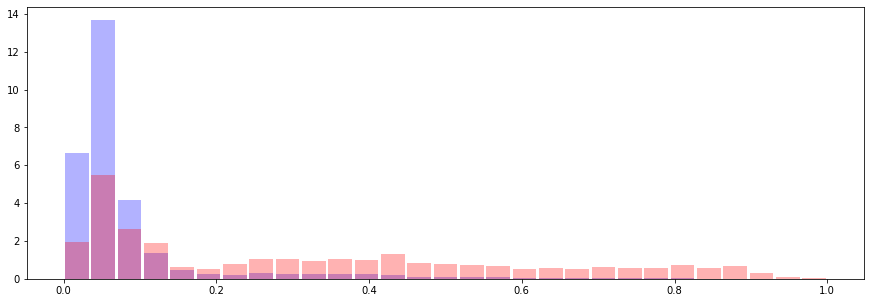

In [18]:
plt.figure(figsize=(15,5))

plt.hist(pred[y_test==0], bins = np.linspace(0,1,30), density = True, color = 'b', alpha = 0.3, rwidth = 0.9)
plt.hist(pred[y_test==1], bins = np.linspace(0,1,30), density = True, color = 'r', alpha = 0.3, rwidth = 0.9);